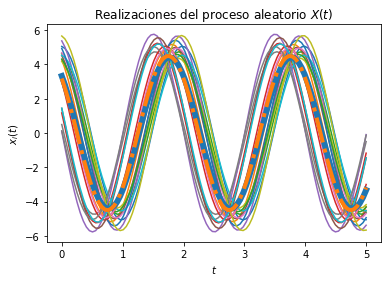

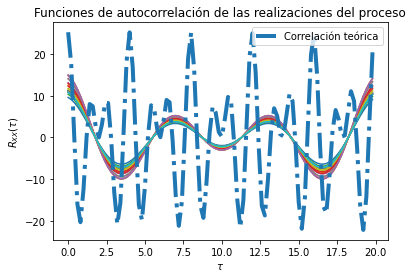

Valor teórico de la media E:
[ 3.18309886  2.64018154  2.03093699  1.37067079  0.67597029 -0.03571209
 -0.7464973  -1.43852883 -2.09442133 -2.69769731 -3.23320113 -3.68747975
 -4.04912069 -4.30903872 -4.46070411 -4.50030671 -4.4268516  -4.24218413
 -3.95094357 -3.56044653 -3.08050316 -2.5231707  -1.90245058 -1.23393668
 -0.53442355  0.1785155   0.88696983  1.57314151  2.21979238  2.81067714
  3.33095143  3.76754482  4.10948912  4.34819391  4.4776624   4.49464207
  4.39870633  4.19226532  3.88050528  3.47125833  2.97480565  2.40361924
  1.77204857  1.09596011  0.39233869 -0.32113915 -1.02654926 -1.70617017
 -2.3429283  -2.92082686 -3.42534775 -3.8438163  -4.16571963 -4.38297083
 -4.49011207 -4.4844517  -4.36613195 -4.13812525 -3.80615965 -3.37857486
 -2.86611276 -2.28164754 -1.63986226 -0.95687999 -0.24985877  0.46343945
  1.16509505  1.83748087  2.46370508  3.02803555  3.51629503  3.91621737
  4.21775562  4.41333448  4.49804057  4.46974588  4.32916123  4.07981844
  3.72798154  3.282489

In [1]:
# Solucion problema 4 (Laboratorio 4)
# Parte A)
# Primero, se importan las librerias y funciones necesarias.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Se definen las variables aleatorias A y Z
vaA = stats.norm(5, np.sqrt(0.2))
vaZ = stats.uniform(0, np.pi/2)

# Se definen las constantes
w = np.pi

# Creación del vector de tiempo
T = 100      # número de elementos
t_final = 5  # tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 20
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (A y Z independientes)
for i in range(N):
	A = vaA.rvs()
	Z = vaZ.rvs()
	x_t = A * np.cos(w*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = (10/np.pi) * (np.cos(w*t)-np.sin(w*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# Parte B) Creación de las muestras del proceso x(t) (w y theta constantes)
# w = pi
theta = 0
for i in range(N):
	A = vaA.rvs()
	y_t = A * np.cos(w*t + theta)
	X_t[i,:] = y_t

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 25.2 * np.cos(w*t+theta) * np.cos(w*(t+taus)+theta)

# Gráficas de correlación para cada realización
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()

print('Valor teórico de la media E:')
print(E)
print()
print('Valor teórico de la correlación Rxx:')
print(Rxx)